## Titanic: Machine Learning from Disaster 

#### Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')
data_test_copy=data_test.copy()

In [3]:
print(data_train.shape)
print(data_test.shape)

(891, 12)
(418, 11)


In [4]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Univarient Analysis

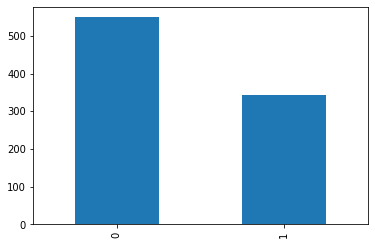

In [9]:
data_train['Survived'].value_counts().plot.bar()

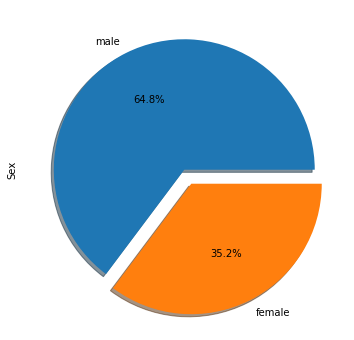

In [10]:
data_train['Sex'].value_counts().plot.pie(explode=[0,0.12],autopct='%1.1f%%',shadow=True,figsize=(6,6))

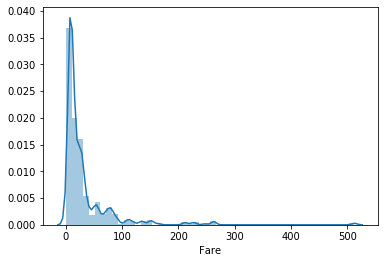

In [11]:
sns.distplot(data_train['Fare'])

### Bivarient Analysis

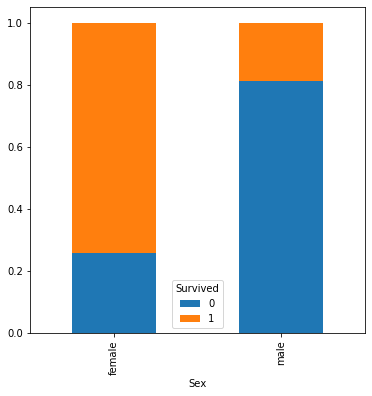

In [12]:
sex_surv=pd.crosstab(data_train['Sex'],data_train['Survived'])
sex_surv.div(sex_surv.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(6,6))

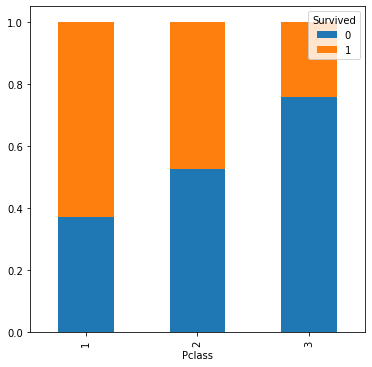

In [13]:
class_surv=pd.crosstab(data_train['Pclass'],data_train['Survived'])
class_surv.div(class_surv.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(6,6))

In [14]:
data_train.groupby(['Survived']).Fare.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

### Correlection Btw Variable's

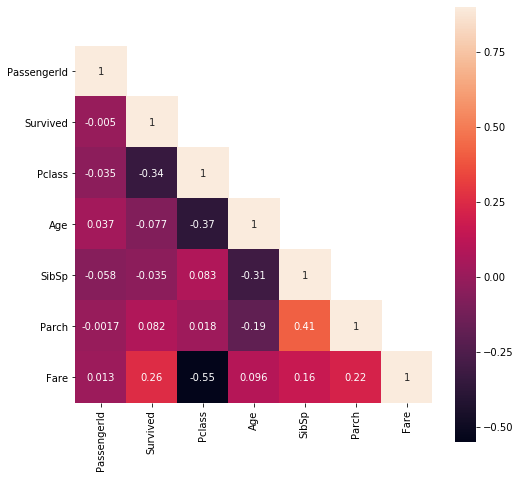

In [15]:
corr=data_train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(8,8))
sns.heatmap(corr,mask=mask,vmax=0.9,square=True,annot=True)

### Missing Value's

In [16]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data_train.drop('Cabin',axis=1,inplace=True)
data_test.drop('Cabin',axis=1,inplace=True)

In [19]:
data_train['Embarked'].mode()

0    S
dtype: object

In [20]:
data_train['Embarked'].fillna("S",inplace=True)

In [21]:
data_train['Age'].fillna(data_train['Age'].median(),inplace=True)
data_test['Age'].fillna(data_test['Age'].median(),inplace=True)

In [22]:
data_test['Fare'].fillna(data_test['Fare'].median(),inplace=True)

In [23]:
data_train['Age'].fillna(data_train['Age'].median(),inplace=True)

In [24]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Feature's

In [26]:
data_train.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)
data_test.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

Creating new feature by combining 2 variable's

In [27]:
data_train['Total_Family']=data_train['SibSp']+1+data_train['Parch']
data_test['Total_Family']=data_test['SibSp']+1+data_test['Parch']

In [28]:
data_train.drop(['SibSp','Parch'],axis=1,inplace=True)
data_test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [29]:
data_train=pd.get_dummies(data_train)
data_test=pd.get_dummies(data_test)

### Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
data_train[['Fare','Age']]=scaler.fit_transform(data_train[['Fare','Age']])

In [32]:
data_test[['Fare','Age']]=scaler.transform(data_test[['Fare','Age']])

In [33]:
data_train

,Survived,Pclass,Age,Fare,Total_Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.565736,-0.502445,2,0,1,0,0,1
1,1,1,0.663861,0.786845,2,1,0,1,0,0
2,1,3,-0.258337,-0.488854,1,1,0,0,0,1
3,1,1,0.433312,0.420730,2,1,0,0,0,1
4,0,3,0.433312,-0.486337,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,-0.181487,-0.386671,1,0,1,0,0,1
887,1,1,-0.796286,-0.044381,1,1,0,0,0,1
888,0,3,-0.104637,-0.176263,4,1,0,0,0,1
889,1,1,-0.258337,-0.044381,1,0,1,1,0,0


#### Data Spliting

In [34]:
X=data_train.drop('Survived',axis=1)
Y=data_train['Survived']

In [35]:
print(X.shape)
print(Y.shape)

(891, 9)
(891,)


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

## Model Selection

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model_lr=LogisticRegression()
model_lr.fit(X_train,Y_train)

C:\Users\yadav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
Y_Predict=model_lr.predict(X_test)

#### Acccuracy Metrics

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(Y_test,Y_Predict)

0.7798507462686567

## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_rfc=RandomForestClassifier(n_estimators=100)
model_rfc.fit(X_train,Y_train)
Y_predict_rfc=model_rfc.predict(X_test)

#### Accuracy

In [45]:
accuracy_score(Y_test,Y_predict_rfc)

0.7686567164179104

## DecisionTreeClassifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
model_DTC=DecisionTreeClassifier(max_depth=6,random_state=0)
model_DTC.fit(X_train,Y_train)
Y_predict_DCT=model_DTC.predict(X_test)

#### Accuracy

In [47]:
accuracy_score(Y_test,Y_predict_DCT)

0.7910447761194029

## XGBClassifier

In [48]:
from xgboost import XGBClassifier
model_XGB=XGBClassifier()
model_XGB.fit(X_train,Y_train)
Y_predict_XGB=model_XGB.predict(X_test)

#### Accuracy

In [49]:
accuracy_score(Y_test,Y_predict_XGB)

0.7686567164179104

## Predicting Test Dataset

In [50]:
Y_data_test=model_DTC.predict(data_test)

In [54]:
submission=pd.DataFrame()
submission['PassengerId']=data_test_copy['PassengerId']
submission['Survive']=Y_data_test

In [56]:
submission.to_csv("submission.csv",header=True,index=False)